<a href="https://colab.research.google.com/github/lapshinaaa/homework_machineLearning/blob/main/homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа

В этой работы мы будем учиться предсказывать зарплату data scientist-ов в зависимочти от ряда факторов с помощью градиентоного бустинга

Цель домашней работы научиться предсказывать зарплаты (salary_in_usd) по ряды факторов

work_year: The number of years of work experience in the field of data science.

experience_level: The level of experience, such as Junior, Senior, or Lead.

employment_type: The type of employment, such as Full-time or Contract.

job_title: The specific job title or role, such as Data Analyst or Data Scientist.

salary: The salary amount for the given job.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The percentage of remote work offered in the job.

company_location: The location of the company or organization.

company_size: The company’s size is categorized as Small, Medium, or Large.

In [1]:
import pandas as pd

In [2]:
!wget https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw-08-boosting/ds_salaries.csv

--2023-06-21 17:08:52--  https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw-08-boosting/ds_salaries.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw-08-boosting/ds_salaries.csv [following]
--2023-06-21 17:08:53--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw-08-boosting/ds_salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210076 (205K) [text/plain]
Saving to: ‘ds_salaries.csv’

ds_salaries.csv     100%[===================>] 205.15K  --.-KB/s    in 0.03s   

2023-06-21 17:08:53 (7.59 MB/s

In [3]:
df = pd.read_csv("ds_salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Задание 1 (0.5 балла)

Разделите выборку на train, val, test (80%, 10%, 10%) в качестве таргета выберите salary_in_usd, удалите из признаков (salary) чтобы избежать лика в данных.

In [5]:
from sklearn.model_selection import train_test_split

# deleting the 'salary' column, defining X and target variable:
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# splitting the data into train, val and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test_test, y_val, y_test_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 17)

X_val

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3311,2022,EX,FT,Head of Data Science,USD,US,100,US,M
175,2023,SE,FT,Data Analyst,GBP,CF,100,CF,M
3676,2021,SE,FT,Machine Learning Scientist,USD,US,100,CA,L
1604,2023,SE,FT,Machine Learning Engineer,EUR,LV,0,LV,M
1426,2023,SE,FT,Machine Learning Engineer,USD,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3039,2022,SE,FT,Data Science Manager,USD,US,100,US,L
2908,2022,SE,FT,Data Analyst,USD,US,0,US,L
1614,2023,SE,FT,Data Scientist,USD,US,100,US,M
3703,2021,MI,FT,Data Scientist,BRL,BR,0,BR,S


## Задание 2 (0.5 балла)

Обучите модель линейной регресии и оцените её качество через mape и rmse

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

categorical_columns = X.select_dtypes(include='object').columns # selecting categorical data
X_train_drop = X_train.drop(categorical_columns, axis=1)
X_val_drop = X_val.drop(categorical_columns, axis=1)
X_test_drop = X_test_test.drop(categorical_columns, axis=1)

# creating an instance of a model and fitting it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_drop, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = linear_regressor.predict(X_test_drop)
y_val_pred = linear_regressor.predict(X_val_drop)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test_test, y_test_pred)
test_rmse = mean_squared_error(y_test_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

# NOTE: a model cannot be fitted without the proper handling of categorical
# features first. In this task, we can either drop them or encode. Since encoding
# is supposed to be performed later, some of the features have been dropped.
# Sklearn's linear regressor cannot perform well without the preliminary data preprocessing.

MAPE score on validation set: 0.6694666794357188
RMSE score on validation set: 59766.824655346245
MAPE score on test set: 0.6514027853443363
RMSE score on test set: 63544.73382433843


## Задание 3 (0.5 балла)

Обучите модель бустинга выберите любую из трех библиотек catboost, xgboost,
lightgbm и оцените её качество через mape и rmse

In [7]:
from xgboost import XGBRegressor

# creating an instance of a model and fitting it
xg_boost = XGBRegressor()
xg_boost.fit(X_train_drop, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = xg_boost.predict(X_test_drop)
y_val_pred = xg_boost.predict(X_val_drop)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test_test, y_test_pred)
test_rmse = mean_squared_error(y_test_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.6059462896177483
RMSE score on validation set: 57367.10506318914
MAPE score on test set: 0.6084349615052234
RMSE score on test set: 62991.68013441048


## Задание 4 (0.5 балла)

Далее предобработайте категориальные признаки с помощью onehot кодирования, labelencoder и счетчиков (mean target encoding) сравните качество моделей с помощью mape и rmse. Необходимо обучить две модели линейную и бустинг. Какие выводы можно сделать? Выберите лучшую из моделей и дальше будем работать с ней

In [8]:
# checking if there are any missing values:
df.isnull().sum() # no missing values found

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# checking how many unique values we have for certain features
print(df['employment_type'].unique())
print(df['experience_level'].unique())
print(df['company_size'].unique())

['FT' 'CT' 'FL' 'PT']
['SE' 'MI' 'EN' 'EX']
['L' 'S' 'M']


In [10]:
!pip install category_encoders
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
target_encoder = TargetEncoder()
one_hot_encoder = OneHotEncoder()

# deleting the 'salary' column, defining X and target variable again
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# encoding categorical features with label encoding and target encoding
label_encoding_cols = ['experience_level', 'company_size',
                        'job_title'] # these features have some kind of order
mean_target_features = ['company_location', 'employee_residence',
                        'salary_currency'] # these features are more connected with the target variable

for feature in label_encoding_cols:
    X[feature] = label_encoder.fit_transform(X[feature])

X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# one-hot encoding for features with no order
one_hot_encoding_cols = ['employment_type', 'work_year']
X_encoded = pd.get_dummies(X, columns=one_hot_encoding_cols, drop_first=True)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_encoded, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

In [32]:
X_train.head()

,experience_level,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,employment_type_FT,employment_type_PT,work_year_2021,work_year_2022,work_year_2023
3565,3,33,83850.270233,86988.344240,100,86890.065019,1,0,1,0,1,0,0
3505,3,69,62281.733082,125515.968509,50,127372.958462,1,0,1,0,1,0,0
115,3,47,149366.906638,152822.011651,0,151822.009539,1,0,1,0,0,0,1
3415,3,47,149366.906638,152822.011651,100,151822.009539,1,0,1,0,0,1,0
2320,3,4,149366.906638,152822.011651,100,151822.009539,1,0,1,0,0,1,0


In [57]:
# Linear regression model
# creating an instance of a model and fitting it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = linear_regressor.predict(X_test)
y_val_pred = linear_regressor.predict(X_val)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.4141838629830557
RMSE score on validation set: 50588.42992251341
MAPE score on test set: 0.4367224064698058
RMSE score on test set: 53997.111817621284


In [53]:
# Boosting model
# creating an instance of a model and fitting it
xg_boost = XGBRegressor()
xg_boost.fit(X_train, y_train)

# getting predictions for test and validation parts of the dataset:
y_test_pred = xg_boost.predict(X_test)
y_val_pred = xg_boost.predict(X_val)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.3439890244115179
RMSE score on validation set: 46666.01666410311
MAPE score on test set: 0.3449703669082042
RMSE score on test set: 51786.26388779677


**ВЫВОДЫ:** Модели, обученные на закодированных данных, имеют более высокое качество. Кроме того, имеет смысл в дальнейшем также использовать OrdinalEncoder, нормализацию значений признаков, другие способы кодирования и далее исследовать взаимосвязи как признаков между собой, так и с целевой переменной. Из новых обученных моделей имеет смысл выбрать модель xgboost и далее работать над улучшением ее качества, поскольку из этих двух моделей она на данном этапе показывает лучший результат.

## Задание 5 (0.5 балла)

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируете их, постарайтесь выделить группы с причинами ошибок в модели. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [54]:
# getting the absolutely values of errors:
abs_error = abs(y_test_pred - y_test)

# creating a data frame with sorted values
errors_result = pd.DataFrame({'y values': y_test, 'Predicted': y_test_pred,
                             'Error': abs_error})
sorted_errors_result = errors_result.sort_values('Error', ascending=False)

sorted_errors_result.head(20)

,y values,Predicted,Error
1288,385000,131569.156250,253430.843750
3463,405000,160521.890625,244478.109375
649,376080,157880.671875,218199.328125
2374,350000,158015.906250,191984.093750
2986,250000,79478.695312,170521.304688
3649,54094,214892.546875,160798.546875
3066,48000,185155.875000,137155.875000
1097,300240,167767.546875,132472.453125
2708,250000,123601.195312,126398.804688
3078,200000,78479.000000,121521.000000


In [55]:
# getting indices of the biggest errors and corresponding examples
error_indices = sorted_errors_result.index.tolist()
error_examples = X.iloc[error_indices]

error_examples

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
1288,2023,3.0,138314.19957,25.0,0,151822.009539,1.0
3463,2022,3.0,138314.19957,28.0,100,151822.009539,0.0
649,2023,3.0,138314.19957,31.0,100,151822.009539,1.0
2374,2022,3.0,138314.19957,47.0,100,151822.009539,1.0
2986,2022,3.0,138314.19957,54.0,0,151822.009539,1.0
...,...,...,...,...,...,...,...
168,2023,2.0,138314.19957,33.0,0,151822.009539,1.0
2134,2022,3.0,138314.19957,33.0,100,151822.009539,1.0
2654,2022,2.0,138314.19957,47.0,0,117182.530481,0.0
3022,2022,3.0,138314.19957,69.0,0,151822.009539,1.0


In [37]:
error_y = y.iloc[error_indices]
error_y

1288    385000
3463    405000
649     376080
2374    350000
3713    120000
         ...  
3332    116150
2077    130000
2134    154600
1810     14307
1262    170000
Name: salary_in_usd, Length: 376, dtype: int64

**ВЫВОДЫ:** наиболее популярной ошибкой модели являются data scientist'ы, работающие FT (full-time). Для большинства из них также верно, что их компании находятся в одном регионе, получают з/п в одной валюте и сами рабочие проживают в одной области. При этом, несмотря на схожесть по многим объясняющим переменным, значения целевой переменной для них разнятся - отсюда и могут следовать ошибки модели. Чтобы избавиться от этих ошибок, можно, во-первых, нормировать значения вышеупомянутых переменных, поскольку они имеют большие значения и явно приводят к переобучению (либо можно использовать с этой же целью регуляризацию). Кроме того, имеет смысл добавить веса более значимым признакам, таким как уровень опыта, job title.

## Задание 6 (0.5 балла)

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качество модели? Реализуйте признаки и проверьте улучшилось ли качество модели. Полный балл за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы

<ipython-input-38-16d682f7920f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


<Axes: >

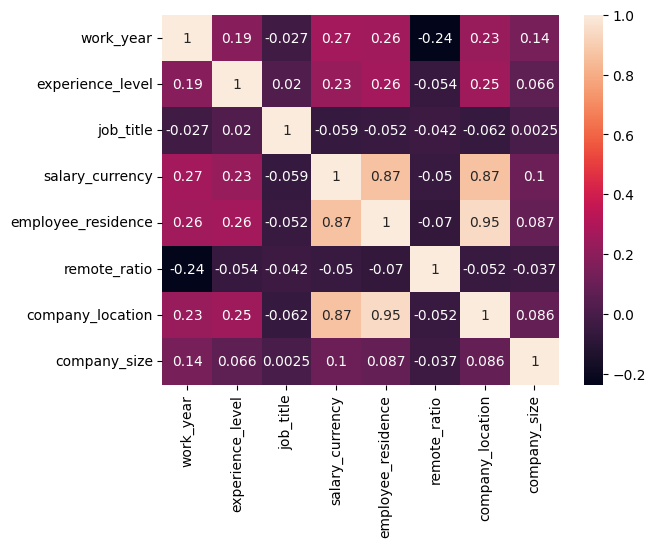

In [38]:
import seaborn as sns
# taking a look at dependencies between the features
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = True)

**ВЫВОДЫ:** логичным сделать предположения (которые подтверждаются приведенной выше матрицей корреляции признаков) о том, что признаки "salary_currency", "employee_residence", и "company_location" имеют большую корреляцию. В таком случае, имеет смысл (чтобы избежать переобучения) объединить эти три признака в один (можем, например, просто оставить признак "company_location" - наиболее полно из трех описывает взаимосвязь с целевой переменной).
Помимо этого, можно добавить новый признак - среднее значение зарплаты в данной области. Поскольку зарплата сильно разнится от региона к региону (тем более, от страны к стране), то сделать это может быть довольно непросто (однако, разумно).
Более корректно закодируем переменные (используем OrdinalEncoder для сохранения иерархии в значениях некоторых категориальных признаков) и посмотрим на результат.

In [71]:
from sklearn.preprocessing import OrdinalEncoder

# deleting the chosen features
X = df.drop(['salary', 'salary_in_usd', 'employee_residence', 'salary_currency'], axis=1)
y = df['salary_in_usd']

ordinal_encoder = OrdinalEncoder() # using OrdinalEncoder to keep the hierarchy
                                    # of values for certain features
xg_boost = XGBRegressor()

# encoding categorical features with ordinal encoding
ordinal_encoding_cols = ['experience_level', 'company_size', 'job_title']
X[ordinal_encoding_cols] = ordinal_encoder.fit_transform(X[ordinal_encoding_cols])

# using mean-target encoding
mean_target_features = ['company_location']
X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# one-hot encoding for features with no order
one_hot_encoding_cols = ['employment_type', 'work_year']
X_encoded = pd.get_dummies(X, columns=one_hot_encoding_cols, drop_first=True)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_encoded, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

# fitting the ridge regression model
xg_boost.fit(X_train, y_train)

# getting predictions for validation and test sets
y_val_pred = xg_boost.predict(X_val)
y_test_pred = xg_boost.predict(X_test)

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

MAPE score on validation set: 0.34328432863355973
RMSE score on validation set: 46893.837950761495
MAPE score on test set: 0.32503993116019414
RMSE score on test set: 51745.09205051025


**РЕЗУЛЬТАТЫ:** качество модели удалось немного повысить за счет реализации вышеуказанных замечаний. В частности уменьшились значения MAPE и RMSE на тестовой выборке.

## Задание 7 (0.5 балла)

Теперь используете исключительно catboost. Обучить модель. Подберите оптимальные гиперпараметры. Используйте pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметры cat_features. Оцените качество итоговой модели, скорость обучения и скорость предсказания

In [40]:
!pip install catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.3 MB/s eta 0:00:00


In [59]:
# deleting the 'salary' column, defining X and target variable again
X = df.drop(['salary', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

In [42]:
# defining categorical features
cat_features = ['experience_level', 'company_size', 'job_title',
                'employment_type', 'employee_residence', 'salary_currency',
                'company_location']

# creating a grid for finding the best hyperparameters for a model
grid_of_params = {'iterations': [100, 200, 300, 400], 'learning_rate':
                  [0.1, 0.3, 0.5], 'depth': [3, 4, 6, 8]}

# using grid search for finding the best values of hyperparameters
grid_search = GridSearchCV(estimator=CatBoostRegressor(cat_features=cat_features),
                           param_grid=grid_of_params, cv=3)

# fitting the model
grid_search.fit(X_train, y_train)

# getting the best model
best_model = grid_search.best_estimator_

# evaluating the quality of the best model
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

Выходные данные были обрезаны до нескольких последних строк (5000).
104:	learn: 36479.6863804	total: 785ms	remaining: 1.46s
105:	learn: 36446.9960633	total: 791ms	remaining: 1.45s
106:	learn: 36431.0951053	total: 798ms	remaining: 1.44s
107:	learn: 36337.4532893	total: 805ms	remaining: 1.43s
108:	learn: 36302.2053769	total: 811ms	remaining: 1.42s
109:	learn: 36228.1568590	total: 818ms	remaining: 1.41s
110:	learn: 36223.4986791	total: 825ms	remaining: 1.41s
111:	learn: 36178.3413996	total: 833ms	remaining: 1.4s
112:	learn: 36166.4639202	total: 840ms	remaining: 1.39s
113:	learn: 36144.6448276	total: 847ms	remaining: 1.38s
114:	learn: 36127.6714939	total: 854ms	remaining: 1.37s
115:	learn: 36087.4210369	total: 861ms	remaining: 1.36s
116:	learn: 36074.3165297	total: 867ms	remaining: 1.36s
117:	learn: 35897.6522086	total: 874ms	remaining: 1.35s
118:	learn: 35837.3913746	total: 880ms	remaining: 1.34s
119:	learn: 35717.7507257	total: 888ms	remaining: 1.33s
120:	learn: 35703.0431711	total: 893m

In [43]:
# measuring the time taken to predict values
import time

# time taken on validation set
start_time = time.time()
y_val_pred = best_model.predict(X_val)
end_time = time.time()
prediction_time_val = end_time - start_time

# time taken on test set
start_time = time.time()
y_test_pred = best_model.predict(X_test)
end_time = time.time()
prediction_time_test = end_time - start_time

print(f"Prediction time on validation set: {prediction_time_val} seconds")
print(f"Time taken on test set: {prediction_time_test} seconds")

Prediction time on validation set: 0.003829479217529297 seconds
Time taken on test set: 0.002559661865234375 seconds


**ВЫВОДЫ:** сама модель обучалась довольно долго - ~5 минут. Время, необходимое для предсказания целевой переменной, довольно небольшое, что говорит о высокой скорости предсказания обученной модели. С наиболее хорошей комбинацией параметров ее качество оказалось довольно высоким. (Pool использовать не удалось - возможно, проблема версии библиотеки).

## Задание 8 (0.5 балла)

Теперь используете исключительно xgboost. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

In [46]:
# preparing the data (just like in task 6)
# deleting the chosen features
X = df.drop(['salary', 'salary_in_usd', 'employee_residence', 'salary_currency'], axis=1)
y = df['salary_in_usd']

ordinal_encoder = OrdinalEncoder() # using OrdinalEncoder to keep the hierarchy
                                    # of values for certain features

# encoding categorical features with ordinal encoding
ordinal_encoding_cols = ['experience_level', 'company_size', 'job_title']
X[ordinal_encoding_cols] = ordinal_encoder.fit_transform(X[ordinal_encoding_cols])

# using mean-target encoding
mean_target_features = ['company_location', 'employment_type']
X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

In [47]:
X_train.head(3)

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
3565,2021,3.0,138314.19957,33.0,100,86890.065019,1.0
3505,2021,3.0,138314.19957,69.0,50,127372.958462,1.0
115,2023,3.0,138314.19957,47.0,0,151822.009539,1.0


In [52]:
# creating a grid for finding the best hyperparameters for a model
grid_of_params = {'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'max_depth': [2, 3, 4, 6, 8]}

# the features have previously been coded (task 6), so we're going to use
# them to fit in a xgboost model

# creating an instance of a model and fitting it
xg_boost_model = XGBRegressor()

grid_search = GridSearchCV(estimator=xg_boost_model, param_grid=grid_of_params, cv=3)

# measuring the time taken for fitting
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

best_model = grid_search.best_estimator_

# getting predictions for test and validation parts of the dataset:
start_time = time.time()
y_val_pred = best_model.predict(X_val)
end_time = time.time()
prediction_time_valid = end_time - start_time

start_time = time.time()
y_test_pred = best_model.predict(X_test)
end_time = time.time()
prediction_time_testing = end_time - start_time

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

print(f"Time taken for training/fitting: {training_time} seconds")
print(f"Prediction time on validation set: {prediction_time_valid} seconds")
print(f"Time taken on test set: {prediction_time_testing} seconds")

MAPE score on validation set: 0.3433096163026118
RMSE score on validation set: 46233.976342261376
MAPE score on test set: 0.34874719657685266
RMSE score on test set: 50079.46410522618
Time taken for training/fitting: 110.12400484085083 seconds
Prediction time on validation set: 0.002454519271850586 seconds
Time taken on test set: 0.0015790462493896484 seconds


**ВЫВОДЫ:** сравнивая данную xgb модель с исходной (обученную без предварительной обработки категориальных признаков) можно отметить значительное улучшение в качестве предсказаний. Само время обучения намного меньше, чем в случае модели catboost (см. значения выше). Время 'инференса' также меньше, а качество предсказаний выше.

## Задание 9 (0.5 балла)

Теперь используете исключительно lightgbm. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

In [72]:
from lightgbm import LGBMRegressor
# performing all the necessary data preprocessing (check task 6)
# deleting the chosen features
X = df.drop(['salary', 'salary_in_usd', 'employee_residence', 'salary_currency'], axis=1)
y = df['salary_in_usd']

ordinal_encoder = OrdinalEncoder() # using OrdinalEncoder to keep the hierarchy
                                    # of values for certain features

# encoding categorical features with ordinal encoding
ordinal_encoding_cols = ['experience_level', 'company_size', 'job_title']
X[ordinal_encoding_cols] = ordinal_encoder.fit_transform(X[ordinal_encoding_cols])

# using mean-target encoding
mean_target_features = ['company_location', 'employment_type']
X[mean_target_features] = target_encoder.fit_transform(X[mean_target_features], y)

# splitting the data into corresponding sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=17)

In [73]:
# creating a grid for finding the best hyperparameters for a model
grid_of_params = {'n_estimators': [100, 200, 300, 400, 500],
                  'learning_rate': [0.1, 0.3, 0.5, 0.7],
                  'max_depth': [2, 3, 4, 6, 8]}

# creating an instance of the model
lgbm_model = LGBMRegressor()

# performing grid search for finding the best hyperparameters
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=grid_of_params, cv=3)

# measuring the time taken for training/fitting
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# getting the best model
best_model = grid_search.best_estimator_

# getting predictions for the validation set and the taken time
start_time = time.time()
y_val_pred = best_model.predict(X_val)
end_time = time.time()
prediction_time_valid = end_time - start_time

# getting predictions for the test set
start_time = time.time()
y_test_pred = best_model.predict(X_test)
end_time = time.time()
prediction_time_testing = end_time - start_time

# evaluating the model's quality
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"MAPE score on validation set: {val_mape}")
print(f"RMSE score on validation set: {val_rmse}")
print(f"MAPE score on test set: {test_mape}")
print(f"RMSE score on test set: {test_rmse}")

print(f"Time taken for training/fitting: {training_time} seconds")
print(f"Prediction time on validation set: {prediction_time_valid} seconds")
print(f"Time taken on test set: {prediction_time_testing} seconds")

MAPE score on validation set: 0.3309825387862829
RMSE score on validation set: 46552.5815551344
MAPE score on test set: 0.33268009529429243
RMSE score on test set: 50161.851587023106
Time taken for training/fitting: 20.25188398361206 seconds
Prediction time on validation set: 0.0021924972534179688 seconds
Time taken on test set: 0.0017595291137695312 seconds


**ВЫВОДЫ:** модель обучилась довольно быстро, особенно в сравнении с предыдущими моделями. Время инференса модели также сравнительно небольшое. Кроме того, данная модель показывает довольно хорошие показатели при измерении качества её предсказаний.

## Задание 10 (0.5 балла)

Сделайте выводы про модели бустинга, какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания

**ИТОГИ:** самой лучшей моделью оказалась модель lgbm. Если использовать предварительно закодированные данные, то такая модель показывает хорошие результаты не только в процессе оценки ее качества, но и в процессе оценки времени её обучения и инференса (см. показатели в строках выше).